In [1]:
import numpy as np
import numpy.random as rand
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
from sklearn.svm import SVC
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = (12, 8)

In [2]:
def plot_contour2(model):
    '''
    plot contour on a grid
    '''
    gx = np.linspace(-1.5, 1.5, 500)
    gy = np.linspace(-1.5, 1.5, 500)
    meshx, meshy = np.meshgrid(gx, gy)
    grid = np.vstack([meshx.flatten(), meshy.flatten()]).T
    p_hat = model.predict_proba(grid)[:, 0].flatten()
    plt.contourf(meshx, meshy, p_hat.reshape(meshx.shape), 
             levels=np.linspace(0, 1, 8), 
             alpha=0.4, cmap=plt.cm.bwr_r)
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])

def plot_mixed_data():
    plt.scatter(Xx, Xy, c=colors[label], alpha=0.2)
    plt.scatter(class_centers_xs, class_centers_ys, marker='o', s=75, 
                color=colors[[0, 0, 0, 0, 1, 1, 1, 1]])
    
N = 1000
np.random.seed(seed=210)

class_centers_xs = rand.uniform(-1, 1, 8)
class_centers_ys = rand.uniform(-1, 1, 8)

class_idxs = rand.randint(0, 8, size=N)
label = class_idxs // 4

X = np.array([rand.multivariate_normal((x, y), 0.075*np.array([[1, 0], [0, 1]]), size=1) 
              for x, y in zip([class_centers_xs[idx] for idx in class_idxs], 
                              [class_centers_ys[idx] for idx in class_idxs])]).squeeze()
Xx = X[:, 0]
Xy = X[:, 1]

colors = np.array(['blue', 'red'])

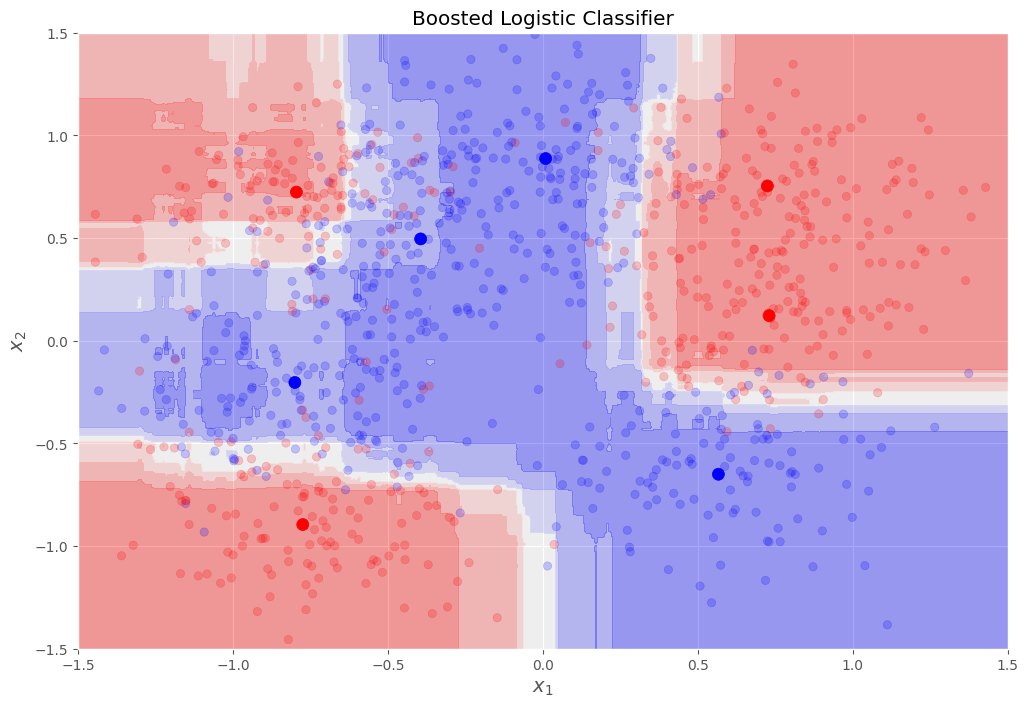

In [3]:
model = GradientBoostingClassifier(learning_rate=0.01,
                                   n_estimators=500,
                                   min_samples_leaf=5,
                                   subsample=0.5)
model.fit(X, label)
plot_contour2(model)
plot_mixed_data()
plt.xlabel('$x_1$', fontsize=14); plt.ylabel('$x_2$', fontsize=14)
_ = plt.title("Boosted Logistic Classifier")

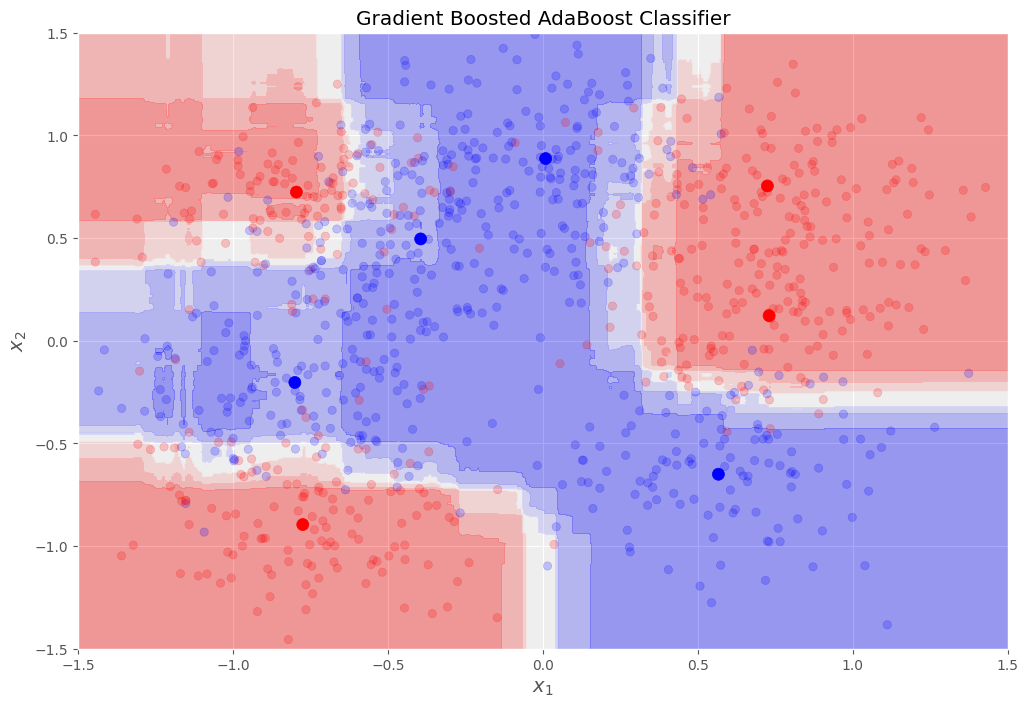

In [4]:
model = GradientBoostingClassifier(loss='exponential',
                                   learning_rate=0.01,
                                   n_estimators=500,
                                   min_samples_leaf=5,
                                   subsample=0.5)
model.fit(X, label)

plot_contour2(model)
plot_mixed_data()
plt.xlabel('$x_1$', fontsize=14); plt.ylabel('$x_2$', fontsize=14)
_ = plt.title("Gradient Boosted AdaBoost Classifier");

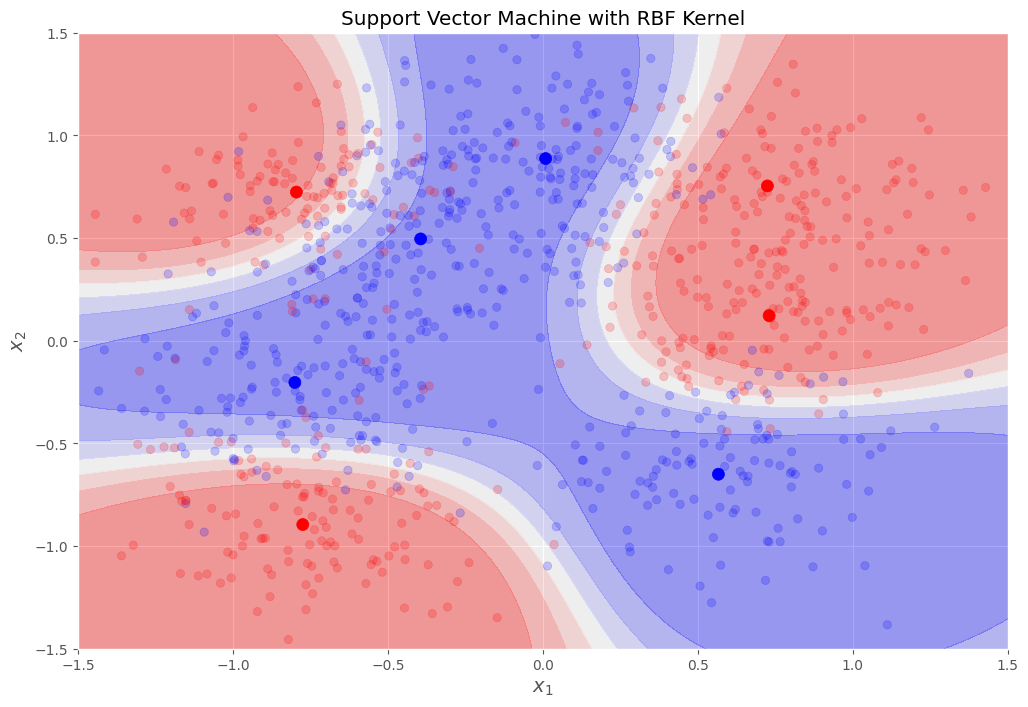

In [5]:
model = SVC(C=0.5, probability=True, gamma = "scale") # Support Vector Classification

model.fit(X, label)

plot_contour2(model)
plot_mixed_data()
plt.xlabel('$x_1$', fontsize=14); plt.ylabel('$x_2$', fontsize=14)
_ = plt.title("Support Vector Machine with RBF Kernel")

Text(0.5, 1.0, 'Random Forest Classifier')

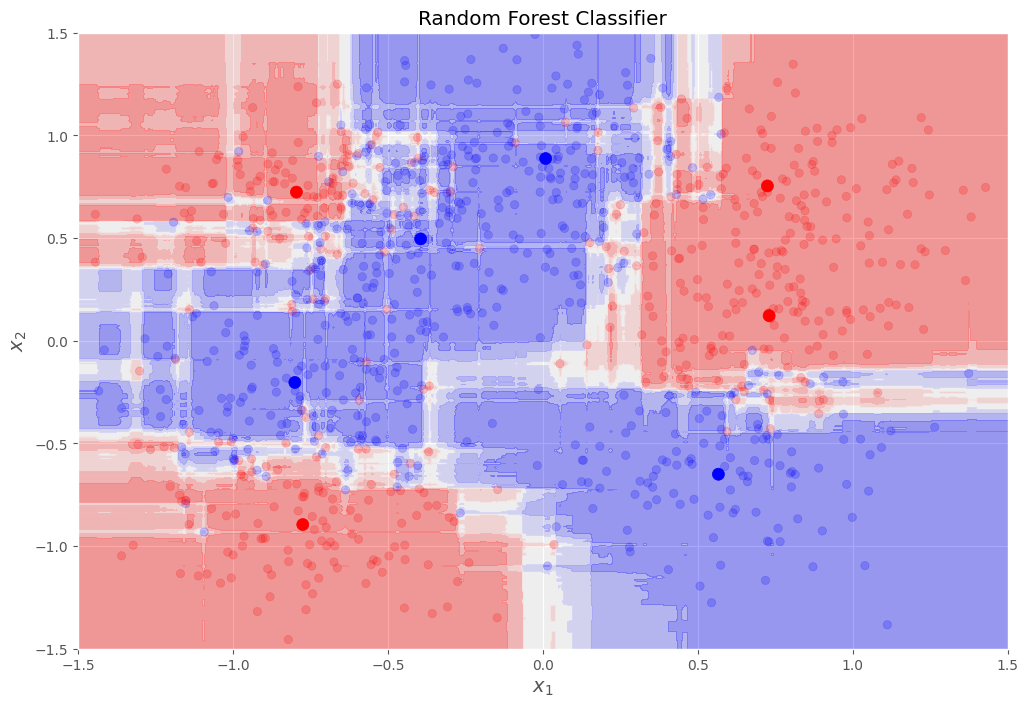

In [6]:
model = RandomForestClassifier(n_estimators=500, n_jobs=6)

model.fit(X, label)

plot_contour2(model)
plot_mixed_data()
plt.xlabel('$x_1$', fontsize=14); plt.ylabel('$x_2$', fontsize=14)
plt.title("Random Forest Classifier")